## Importing Libraries

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import seaborn as sb
import pandas as pd

## Reading Some Graphs

In [2]:
gRoadNetCa = nx.read_edgelist('./roadNet-CA.txt', comments="#", delimiter="\t", create_using=nx.Graph())
gRoadNetTx = nx.read_edgelist('./roadNet-TX.txt', comments='#', delimiter='\t', create_using=nx.Graph())

## Node Degree

The node degree corresponds to the amount of neighbors that is linked to a node. It varies according to the following two properties:
* Undirected Graph: Is the amount of edges that connect a node $k_{i}$ to its neighbors.
* Directed Graph: Is the amount of incoming and outgoing edges of a Node. Thus the degree of a node is $k_i=k_{i}^{out}+k_{i}^{in}$.

To retrieve the degree of each node is quite simple using networkx, the only thing necessary is to call the built-in function `networkx.degree()` in the library. The functin receives as argument a graph and as a result returns a dictionary containing the degree of each node.


In [3]:
degreeCa = pd.DataFrame(pd.Series(nx.degree(gRoadNetCa)), columns=["Degree"])
degreeTx = pd.DataFrame(pd.Series(nx.degree(gRoadNetTx)), columns=["Degree"])

In [4]:
#degreeCa.index = [x for x in range(0, len(degreeCa), 1)]
#degreeTx.index = [x for x in range(0, len(degreeTx), 1)]

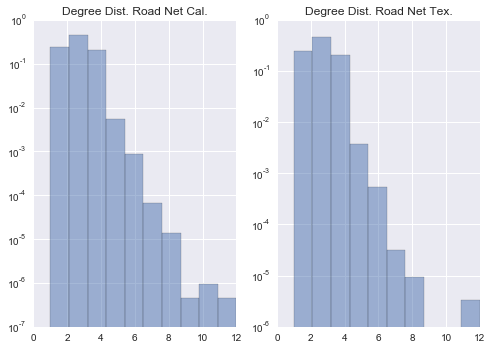

In [5]:
fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].hist(degreeCa['Degree'], normed=True, alpha=0.5, stacked=True, log=True)
ax[0].set_title('Degree Dist. Road Net Cal.')
ax[1].hist(degreeTx['Degree'], normed=True, alpha=0.5, stacked=True, log=True)
ax[1].set_title('Degree Dist. Road Net Tex.')

## Clustering Coefficients

In [6]:
clusteringCa = nx.clustering(gRoadNetCa)
clusteringTx = nx.clustering(gRoadNetTx)

In [7]:
clusteringCa = pd.DataFrame(pd.Series(clusteringCa), 
                            columns=["Clust.Coeff."])
clusteringTx = pd.DataFrame(pd.Series(clusteringTx), 
                            columns=["Clust.Coeff."])

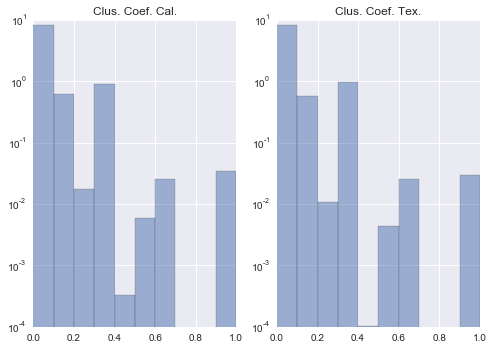

In [8]:
fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].hist(clusteringCa['Clust.Coeff.'], normed=True, alpha=0.5, log=True)
ax[0].set_title('Clus. Coef. Cal.')
ax[1].hist(clusteringTx['Clust.Coeff.'], normed=True, alpha=0.5, log=True)
ax[1].set_title('Clus. Coef. Tex.')

## Number of Connected Components and Their Sizes

In [9]:
number_components_ca = nx.number_connected_components(gRoadNetCa)
number_components_tx = nx.number_connected_components(gRoadNetTx)

In [10]:
print("Number Components California:", number_components_ca)
print("Number Components Texas:", number_components_tx)

Number Components California: 2638
Number Components Texas: 424


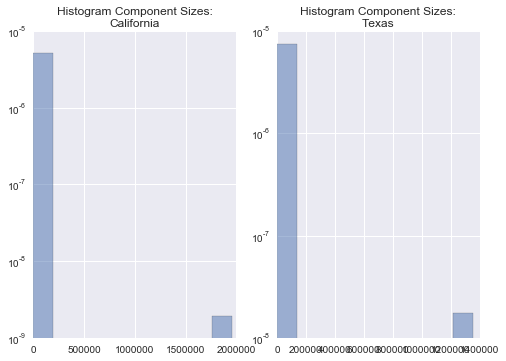

In [14]:
con_comp_ca = list(nx.connected_component_subgraphs(gRoadNetCa))
con_comp_tx = list(nx.connected_component_subgraphs(gRoadNetTx))
scon_comp_ca = [nx.number_of_nodes(con_comp_ca[x])  for x in range(0, len(con_comp_ca), 1)]
scon_comp_tx = [nx.number_of_nodes(con_comp_tx[x])  for x in range(0, len(con_comp_tx), 1)]
fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].hist(scon_comp_ca, normed=True, stacked=True, log=True,  alpha=0.5)
ax[0].set_title('Histogram Component Sizes:\nCalifornia')
ax[1].hist(scon_comp_tx, normed=True, stacked=True, log=True,  alpha=0.5)
ax[1].set_title('Histogram Component Sizes:\nTexas')

In [25]:
betweenness_centrality_ca = nx.betweenness_centrality(gRoadNetCa, k=100)
betweenness_centrality_tx = nx.betweenness_centrality(gRoadNetTx, k=100)

In [31]:
bet_centrality_ca = pd.DataFrame(pd.Series(betweenness_centrality_ca), columns=["Bet.Centrality"])
bet_centrality_tx = pd.DataFrame(pd.Series(betweenness_centrality_tx), columns=['Bet.Centrality'])

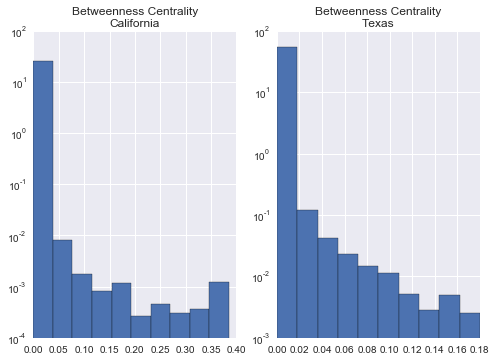

In [39]:
fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].hist(bet_centrality_ca['Bet.Centrality'], normed=True, log=True, stacked=True, alpha=0.5)
ax[0].set_title("Betweenness Centrality\nCalifornia")
ax[1].hist(bet_centrality_tx['Bet.Centrality'], normed=True, log=True, stacked=True, alpha=0.5)
ax[1].set_title("Betweenness Centrality\nTexas")

# Closeness Centrality

In [ ]:
closenness_centrality_ca = nx.closeness_centrality(gRoadNetCa)
closenness_centrality_tx = nx.closeness_centrality(gRoadNetTx)